<a href="https://colab.research.google.com/github/mgbhat97/Airbnb-Booking-EDA/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath_data = '/content/drive/MyDrive/AlmaBetter/Capstone Project/Airbnb EDA Project/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(filepath_data)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Replacing Null Values with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##Overview

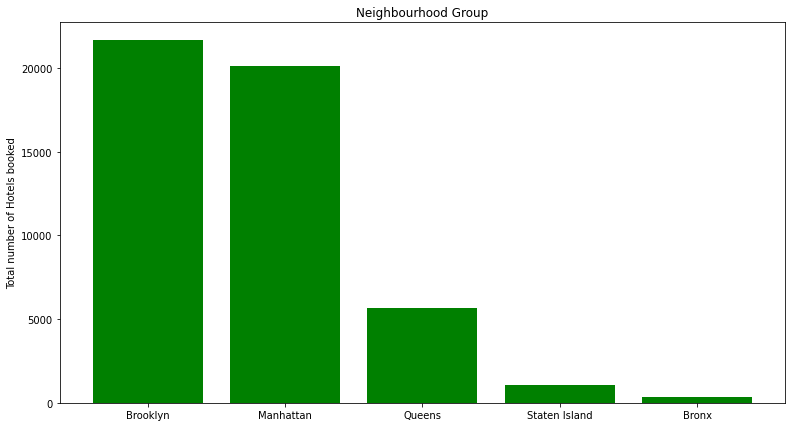

In [11]:
# comparing number of count of hotels across various neighbourhood
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
plt.ylabel("Total number of Hotels booked")
plt.bar(df['neighbourhood_group'].unique(),df.neighbourhood_group.value_counts(),color ='green')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


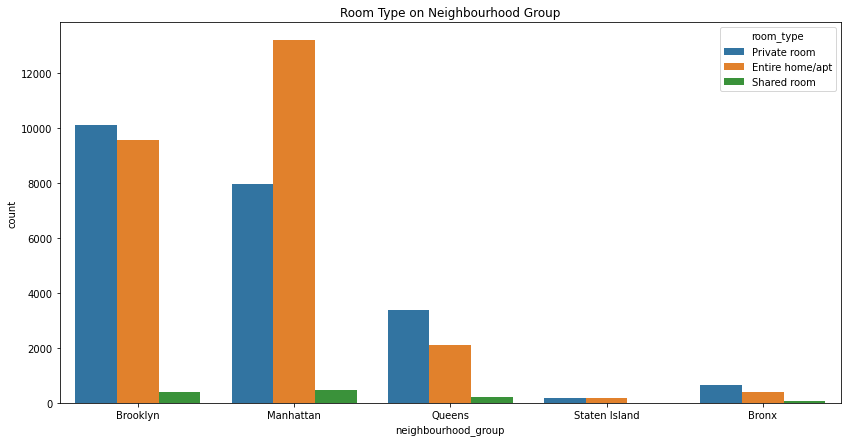

In [12]:
# Plotting type of rooms in each neighbourhood
plt.figure(figsize=(14,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

In [13]:
# Types of rooms available at Airbnb NYC
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
# Number of rooms in each category of room
df.groupby(['room_type'])['id'].count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: id, dtype: int64

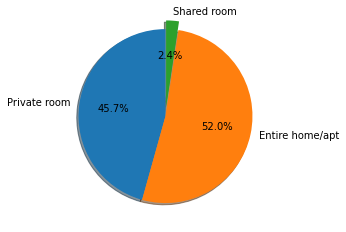

In [15]:
# Pie chart plot
labels = 'Private room', 'Entire home/apt', 'Shared room'
sizes = [22326,25409,1160]
explode = (0, 0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  

plt.show()

In [16]:
df.sort_values('price', ascending =False, inplace=True)

In [17]:
# Top 10 Costliest Hotels
df[['name','price']].head(10)

,name,price
9151,Furnished room in Astoria apartment,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999
6530,Spanish Harlem Apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4377,Film Location,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),7703
42523,70' Luxury MotorYacht on the Hudson,7500


In [18]:
#Top 10 Lowest priced Hotels
df[['name','price']].tail(10)

,name,price
26259,the best you can find,0
26866,Best Coliving space ever! Shared room.,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",0
25794,Spacious comfortable master bedroom with nice ...,0
25778,Modern apartment in the heart of Williamsburg,0
25796,Cozy yet spacious private brownstone bedroom,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,0
26841,Coliving in Brooklyn! Modern design / Shared room,0
25795,Contemporary bedroom in brownstone with nice view,0


##Average Price Analysis and comparison

In [19]:
# Overall average price of rooms
df['price'].mean()

152.7206871868289

In [20]:
avg_price_ngb_df = df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [21]:
avg_price_ngb_df.rename(columns={'price':'average_price'})

,neighbourhood_group,average_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


(-0.5, 4.5, 0.0, 600.0)

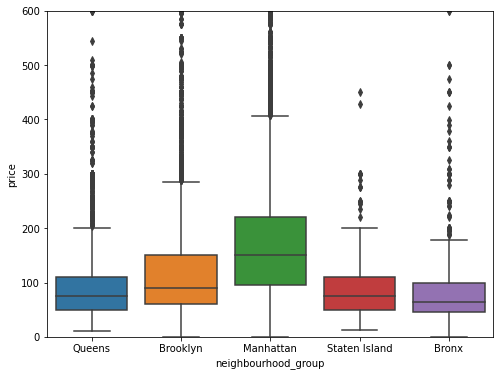

In [22]:
data = pd.concat([df['neighbourhood_group'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot( x= 'neighbourhood_group', y="price", data=data)
fig.axis(ymin=0, ymax=600)

In [23]:
avg_room_price_ngb_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()

In [24]:
avg_room_price_ngb_df.rename(columns={'price':'average_price'})

,neighbourhood_group,room_type,average_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [27]:
# price variation with type of rooms
avg_room_price_room_df = df.groupby('room_type')['price'].mean().reset_index()

In [28]:
avg_room_price_room_df.rename(columns={'price':'average_price'})

,room_type,average_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


(-0.5, 2.5, 0.0, 600.0)

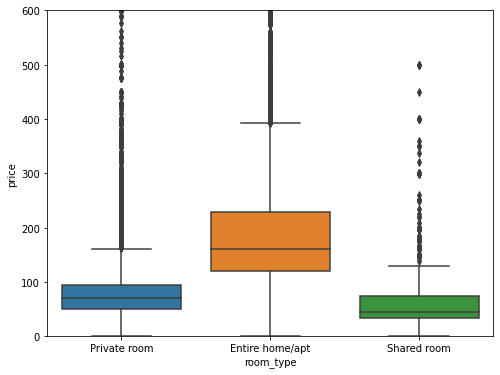

In [29]:
data = pd.concat([df['room_type'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot( x= 'room_type', y="price", data=data)
fig.axis(ymin=0, ymax=600)

## Traffic Analysis

In [31]:
# top busiest stays in each neighbourhood
neighbourhood_df=df.groupby(['neighbourhood','host_name'])['host_id'].count().reset_index()

In [32]:
new_df=neighbourhood_df.rename(columns={'host_id':'room_booked'})#.sort_values(by='room_booked',ascending=False).head(10)

In [33]:
max_booked_df=new_df.groupby('neighbourhood').max('room_booked')

In [34]:
merged_df = pd.merge(max_booked_df,new_df, how='inner',left_on=['room_booked','neighbourhood'],right_on=['room_booked','neighbourhood'])

In [35]:
merged_df

,room_booked,neighbourhood,host_name
0,5,Allerton,William
1,1,Arden Heights,Nabil
2,1,Arden Heights,Olga
3,1,Arden Heights,Viktor
4,1,Arden Heights,Vlad
...,...,...,...
411,9,Woodhaven,Viviana
412,2,Woodlawn,Shera
413,2,Woodlawn,Yesenia
414,1,Woodrow,Donna


In [36]:
# Top 10 Hosts OR just sort by 'calculated_host_listings_count'
host_df = df.groupby(['host_name','host_id'])['host_id'].count()

In [37]:
host_df.sort_values(ascending=False).head(10)

host_name          host_id  
Sonder (NYC)       219517861    327
Blueground         107434423    232
Kara               30283594     121
Kazuya             137358866    103
Jeremy & Laura     16098958      96
Sonder             12243051      96
Corporate Housing  61391963      91
Ken                22541573      87
Pranjal            200380610     65
Vida               7503643       52
Name: host_id, dtype: int64

## Availability

In [38]:
# Overall average availability of rooms
df['availability_365'].mean()

112.78132733408324

In [39]:
# average availability of rooms by neighbourhood group
avg_availabilty_df =df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

In [40]:
# Rename column name of availability_365 as average_availability
avg_availabilty_df.rename(columns={'availability_365':'average_availability'})

,neighbourhood_group,average_availability
0,Bronx,165.758937
1,Brooklyn,100.232292
2,Manhattan,111.979410
3,Queens,144.451818
4,Staten Island,199.678284


<BarContainer object of 5 artists>

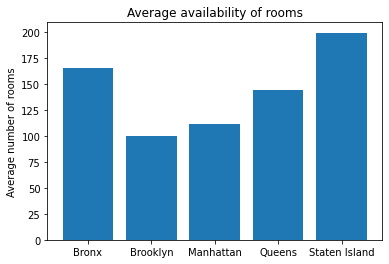

In [41]:
#plotting a bar graph of average availability of rooms in various neighbourhood
plt.title("Average availability of rooms")
plt.ylabel("Average number of rooms")
plt.bar(avg_availabilty_df['neighbourhood_group'],height=avg_availabilty_df['availability_365'])

In [42]:
# Average availability in each neigbhourhood
avg_availabilty_neigbhourhood_df =df.groupby('neighbourhood')['availability_365'].mean().reset_index()

In [43]:
# Rename column name of availability_365 as average_availability
avg_availabilty_neigbhourhood_df.rename(columns={'availability_365':'average_availability'})


,neighbourhood,average_availability
0,Allerton,163.666667
1,Arden Heights,94.250000
2,Arrochar,255.809524
3,Arverne,188.428571
4,Astoria,109.191111
...,...,...
216,Windsor Terrace,81.885350
217,Woodhaven,200.920455
218,Woodlawn,98.272727
219,Woodrow,0.000000


In [44]:
avg_availabilty_neigbhourhood_df.sort_values('availability_365', ascending =False, inplace=True)

In [45]:
avg_availabilty_neigbhourhood_df

,neighbourhood,availability_365
82,Fort Wadsworth,365.000000
42,Co-op City,364.000000
215,Willowbrook,351.000000
65,Eastchester,333.461538
165,Richmondtown,300.000000
...,...,...
130,Morningside Heights,43.054913
57,Downtown Brooklyn,39.481928
9,"Bay Terrace, Staten Island",0.000000
141,New Dorp,0.000000


## Corelation 

In [47]:
# Corelation between various parameters
required_df = df[['availability_365','price','number_of_reviews','minimum_nights','reviews_per_month']]

In [48]:
corelate_df = required_df.corr()

In [49]:
corelate_df

,availability_365,price,number_of_reviews,minimum_nights,reviews_per_month
availability_365,1.000000,0.081829,0.172028,0.144303,0.163732
price,0.081829,1.000000,-0.047954,0.042799,-0.050564
number_of_reviews,0.172028,-0.047954,1.000000,-0.080116,0.589407
minimum_nights,0.144303,0.042799,-0.080116,1.000000,-0.124905
reviews_per_month,0.163732,-0.050564,0.589407,-0.124905,1.000000


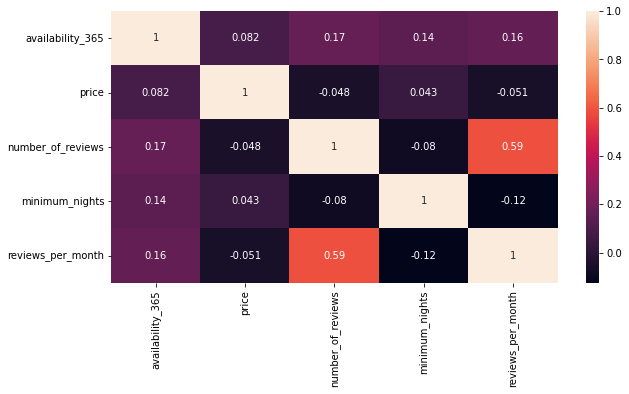

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(corelate_df, annot=True)

## Minimum Night analysis

In [51]:
# Minimum nights
mini_ngt_df = df.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()

In [52]:
mini_ngt_df

,neighbourhood_group,minimum_nights
0,Bronx,4.560953
1,Brooklyn,6.056556
2,Manhattan,8.579151
3,Queens,5.181433
4,Staten Island,4.831099


(-0.5, 4.5, 0.0, 20.0)

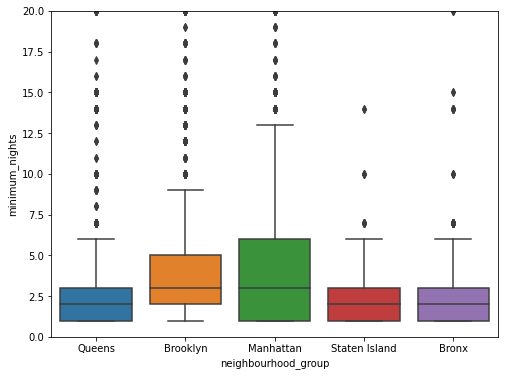

In [53]:
#plot of minimum night
data = pd.concat([df['neighbourhood_group'], df['minimum_nights']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot( x= 'neighbourhood_group', y="minimum_nights", data=data)
fig.axis(ymin=0, ymax=20)

In [54]:
# minmum nights spent in various type of rooms
mini_ngt_room_df = df.groupby('room_type')['minimum_nights'].mean().reset_index()

In [55]:
mini_ngt_room_df

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


In [56]:
# most number of days occupied in a stay or maximum number of minimum nights spent
df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'availability_365']].sort_values('minimum_nights',ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,Entire home/apt,180,1250,365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,Entire home/apt,400,1000,362
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,Private room,79,999,249
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,Entire home/apt,99,999,42
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,Shared room,110,999,365
...,...,...,...,...,...,...,...,...,...,...
19332,15423623,Wonderful private room in Williamsburg,7157161,Patrick,Brooklyn,Williamsburg,Private room,90,1,341
8135,6269945,Manhattan Apartment (Female Guests),32583105,Nancy,Manhattan,Upper East Side,Private room,90,1,359
8215,6331598,Stylish Apt in the Heart of BedStuy,32958503,Shatia,Brooklyn,Bedford-Stuyvesant,Entire home/apt,90,1,0
19043,15126686,Guest bedroom off of 30th ave,95886123,Melissa,Queens,Astoria,Private room,90,1,331


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group Map')

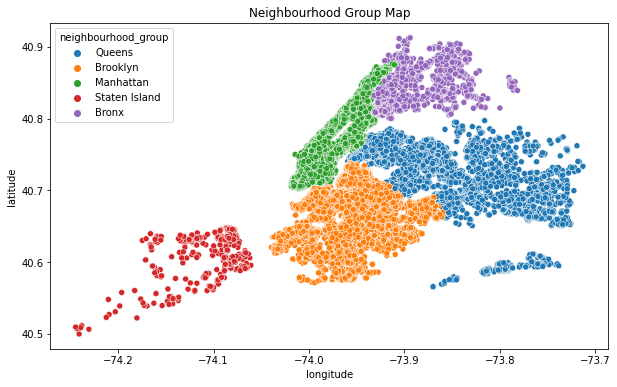

In [57]:
title = 'Neighbourhood Group Map'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Room type distribution across Neighbourhood Group')

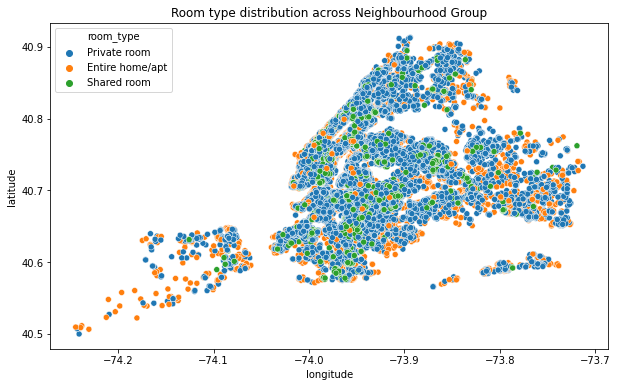

In [58]:
title = 'Room type distribution across Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type).set_title(title)